In [14]:
get_rotation_matrix = function(radians, axis=0){
    # https://en.wikipedia.org/wiki/Rotation_matrix#In_three_dimensions
    if (axis==0){
        return(matrix(c(1,0,0,0,cos(radians), sin(radians), 0, -sin(radians), cos(radians)), 3, 3))
    } else if(axis == 1){
        return(matrix(c(cos(radians), 0, -sin(radians), 0, 1, 0, sin(radians), 0, cos(radians)), 3, 3))
    } else {
        return(matrix(c(cos(radians), sin(radians), 0, -sin(radians), cos(radians), 0, 0, 0, 1), 3, 3))
    }
}

get_3axis_rotation_matrix = function(x, y, z){
    return(get_rotation_matrix(x, 0) %*% get_rotation_matrix(y, 1) %*% get_rotation_matrix(z, 2))
}

In [15]:
rotate_cube = function(cube, ...){
    return(cube %*% get_3axis_rotation_matrix(...))
}

In [16]:
draw_cube = function(cube, from_axis=0){
    # Given cube with sorted points
    
    # Axis from which to view cube
    if(from_axis == 0){
        ax = c(2, 3)
    } else if(from_axis == 1){
        ax = c(1, 3)
    } else {
        ax = c(1, 2)
    }
    
    # Draws 2 squares and connects the corners to make a cube
    side1 = cube[c(1,2,4,3,1),]
    side2 = cube[c(1,2,4,3,1) + 4,]
    lines(side1[,ax[1]], side1[,ax[2]])
    lines(side2[,ax[1]], side2[,ax[2]])
    
    for(i in 1:4){
        connector = rbind(side1[i,], side2[i,])
        lines(connector[,ax[1]], connector[,ax[2]])
    }
}

In [17]:
get_projection = function(cube, axis=1, zoom=10){
    # All dimensions except axis
    ax = c(1:dim(cube)[2])
    ax = ax[ax != axis]
    
    proj = cube[,ax]/(zoom - cube[,axis])
    return(proj)
}

In [18]:
draw_projection = function(proj){
    # Add a dummy column so it can be drawn as a cube
    cube = cbind(proj, matrix(0, dim(proj)[1]))
    draw_cube(cube, from_axis = 2)
}

In [36]:
mod = function(x, d){
    return(((x-1) %% d) + 1)
}

In [48]:
is_in = function(x, x_range){
    return(x_range[1] <= x && x <= x_range[2])
}

In [19]:
cube = matrix(c(0,0,0, 0,0,1, 0,1,0, 0,1,1, 1,0,0, 1,0,1, 1,1,0, 1,1,1), byrow=T, 8, 3)
cube

0,0,0
0,0,1
0,1,0
0,1,1
1,0,0
1,0,1
1,1,0
1,1,1


In [29]:
x = rnorm(100)-2
y = rnorm(100)
z = rnorm(100)
data= cbind(x, y, z)

x2 = rnorm(100) + 2
y2 = rnorm(100)
z2 = rnorm(100)
data2 = cbind(x2, y2, z2)

data

x,y,z
-2.7183213,-0.61036713,-0.29169374
-1.5717244,0.55368136,1.67851834
-1.5157388,1.16392151,-0.16566718
-5.0736039,1.05674333,1.12485692
-3.1101737,0.40656876,-0.22434066
-2.3418754,1.24440865,-0.65393244
-1.0191769,1.36277724,0.37224342
-2.4137994,0.18734036,-0.67768141
-3.2124748,0.46429706,-0.01592859
-0.8608164,-1.37036701,1.20916415


In [44]:
cols = c("orange", "green")

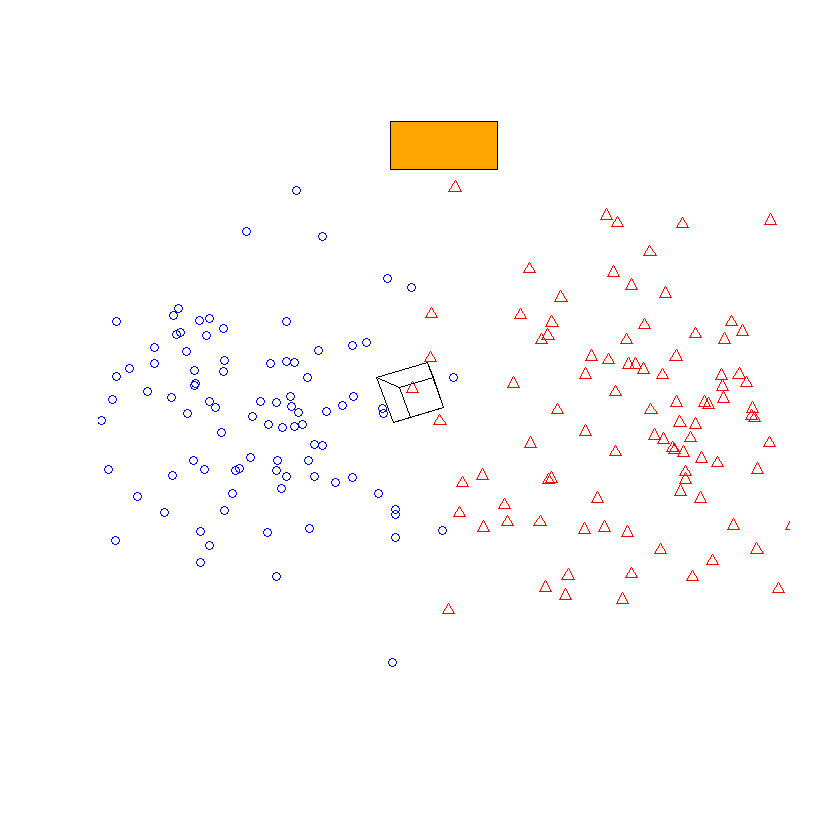

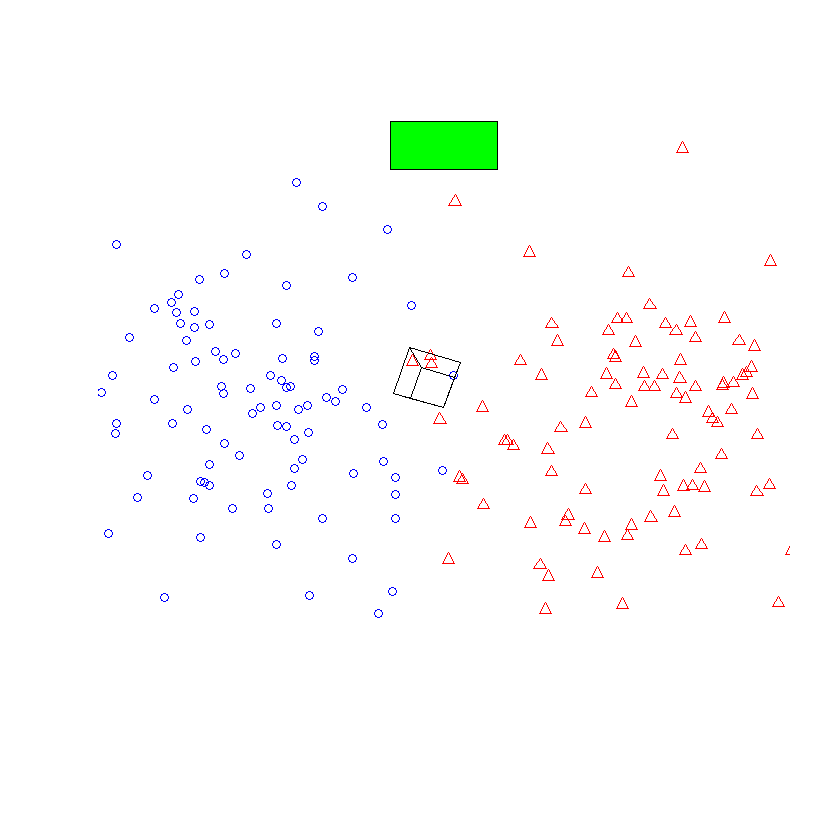

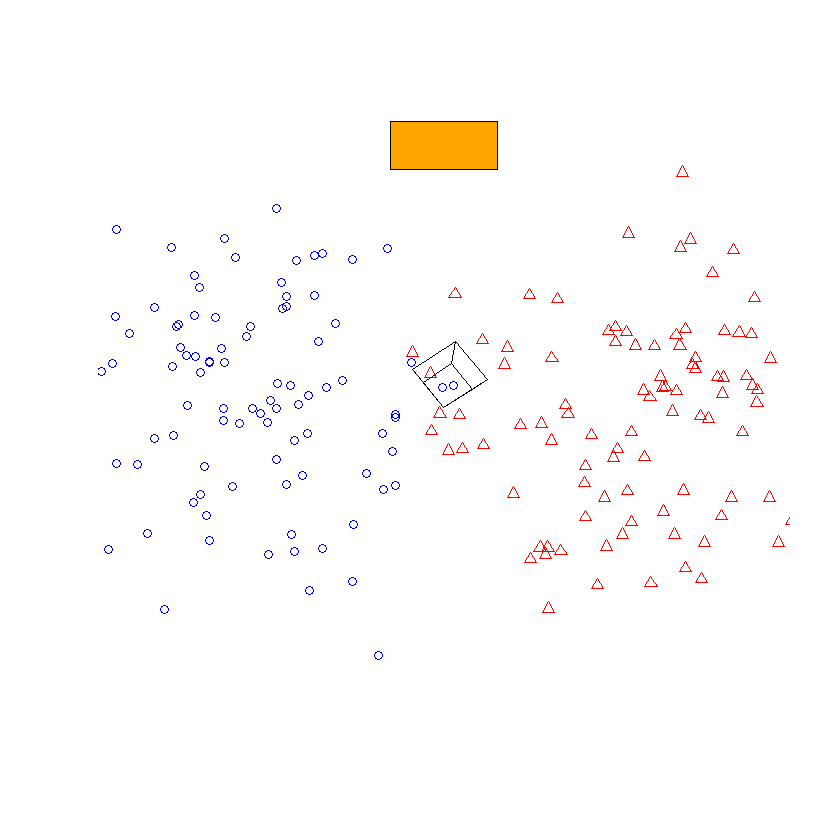

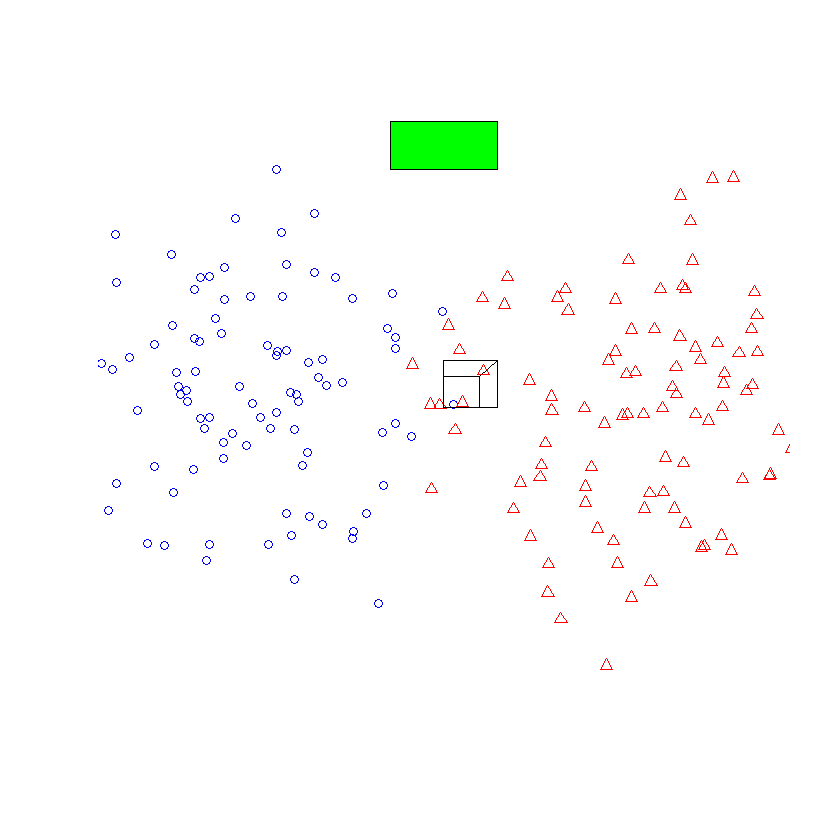

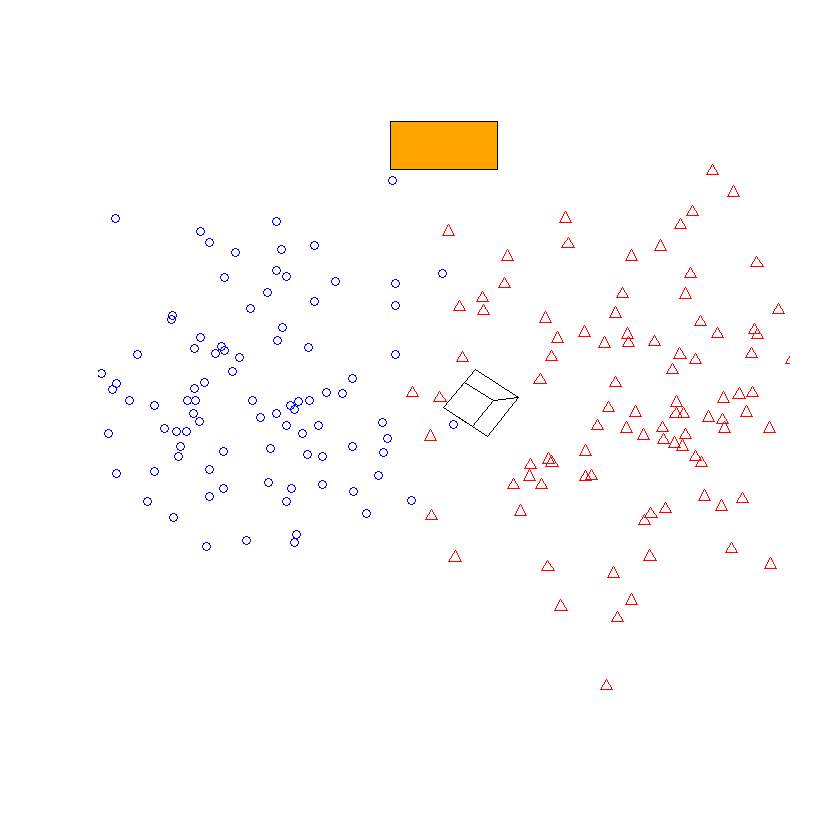

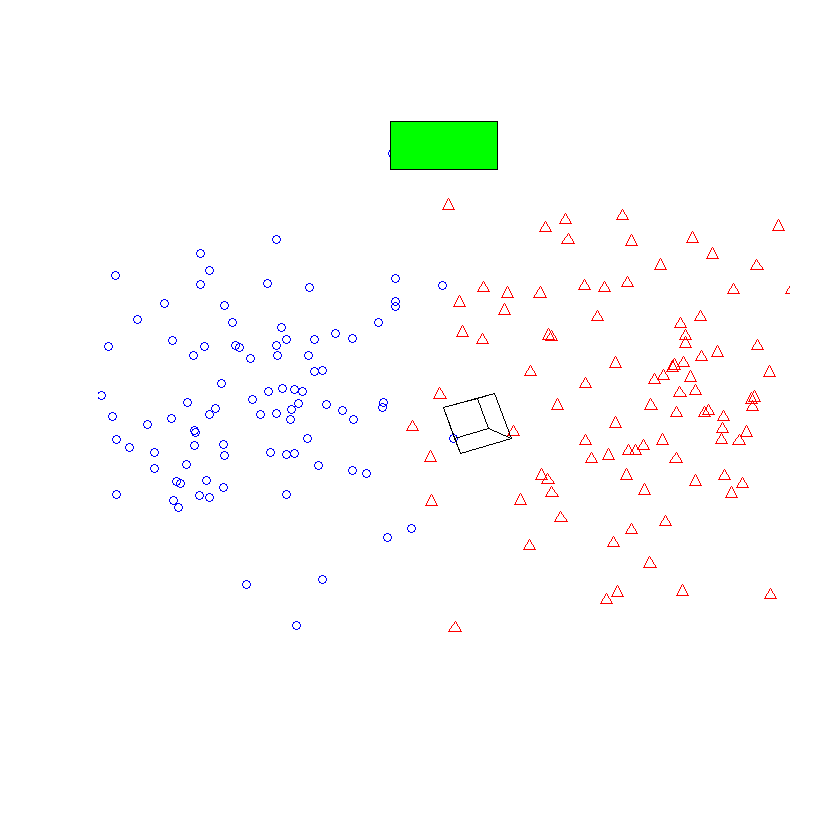

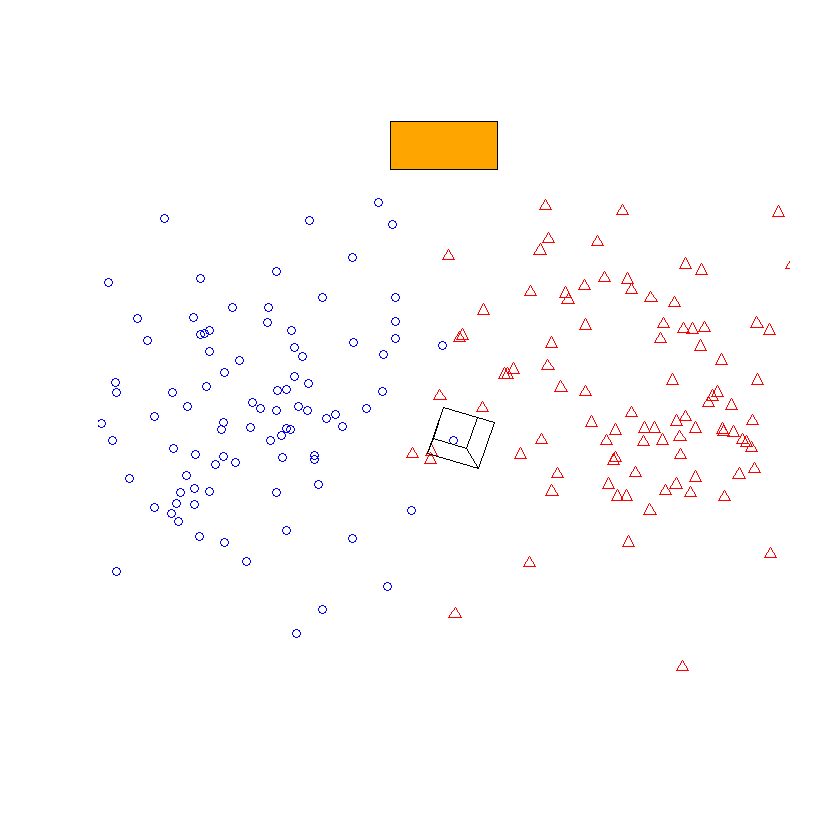

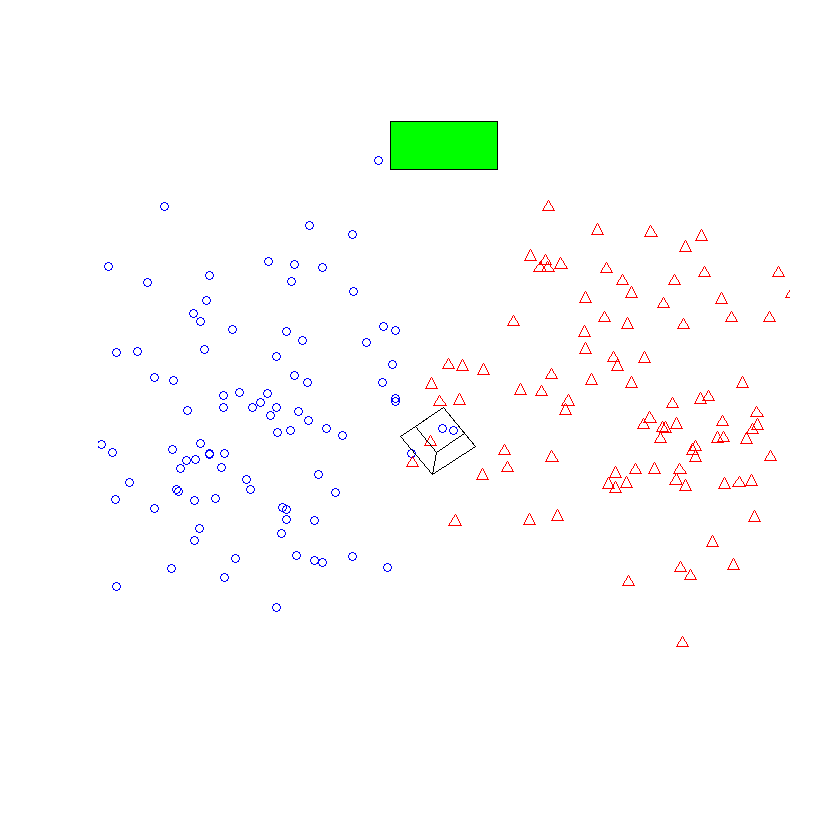

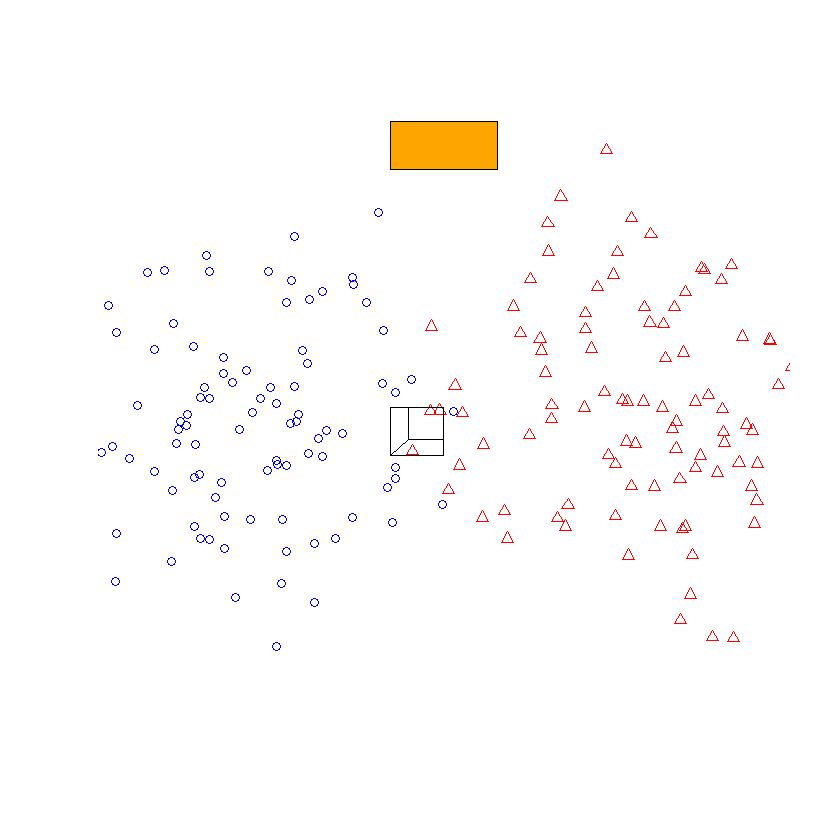

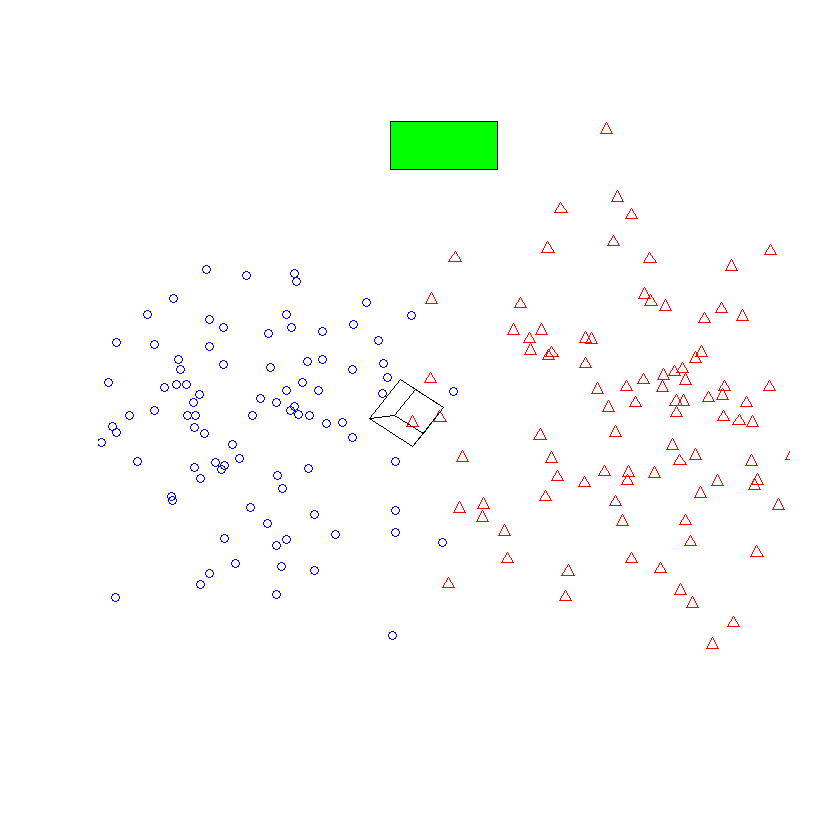

In [45]:
rotations = 10
rot_angle = 2*pi/rotations
for (i in 1:rotations){
    plot.new()
    plot.window(xlim=c(-3,3), ylim = c(-3,3))
    
    cube = cube %*% get_rotation_matrix(rot_angle)
    data = data %*% get_rotation_matrix(rot_angle)
    data2 = data2 %*% get_rotation_matrix(rot_angle)

    points(data[,1], data[,2], col="blue", pch=1)
    points(data2[,1], data2[,2], col="red", pch=2)

    proj = get_projection(cube, zoom=3)
    draw_projection(proj)
    
    colour = cols[mod(i, length(cols))]
    rect(-0.5, 2.5, 0.5, 3, col=colour)
    
}

In [ ]:
# Code that lets you click on the screen. If you click inside the rectangle (bounds) it changes colour.
# pos = locator(n = 1)
   
# x_bound = c(-0.5, 0.5)
# y_bound = c(2.5, 3)
# if (is_in(pos$x, x_bound) && is_in(pos$y, y_bound))
# {
#     rectangle = rect(-0.5,2.5,0.5,3,col="orange")
#     rectcol = "orange"
# }